In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
# importing libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm # For OLS(Ordinary Least Square)
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.simplefilter("ignore") 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [3]:
# reading the kaggle dataset
data=pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# drop uncecesary features
data.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)

# **EXPLORATORY DATA ANALYSIS**

In [5]:
# find missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

**OBSERVATION : we see no NULL values**

In [6]:
#Exploring Numerical Features
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!="O"]
numerical_feature

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [7]:
# Extracting Discrete Numerical Features from Numerical Features(threshould=25)
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<=25]
discrete_feature 

['peakrpm']

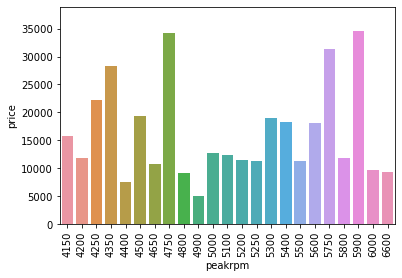

In [8]:
# Checking dependency of "price" on "peakrpm" Discrete Numerical Feature
for feature in discrete_feature:
    sns.barplot(data[feature],data['price'],errwidth=0)
    plt.xticks(rotation=90)
    plt.show()

In [9]:
# Extracting Continuous Numerical Features from Numerical Features
continuous_feature = [feature for feature in numerical_feature if feature not in ['peakrpm','car_ID','price']]
continuous_feature

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'citympg',
 'highwaympg']

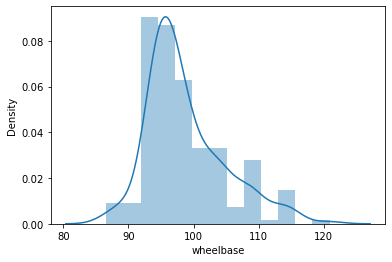

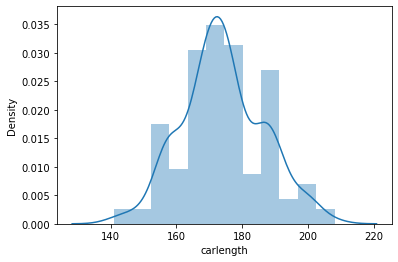

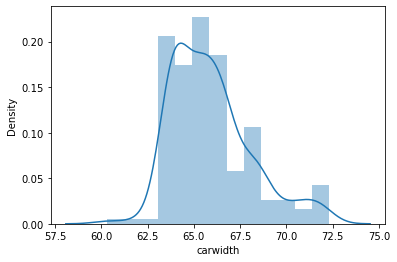

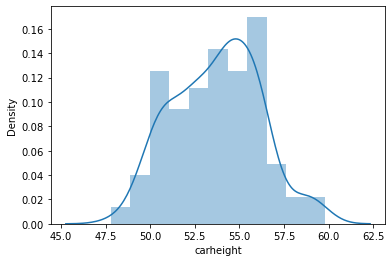

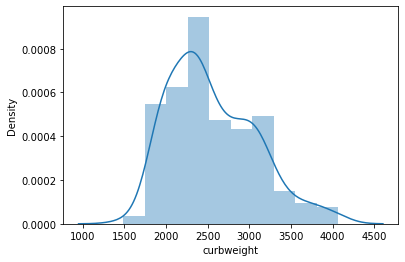

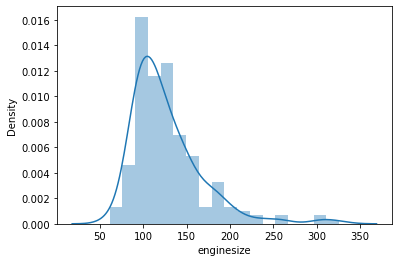

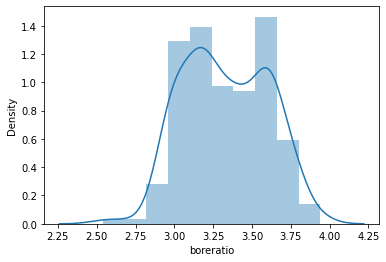

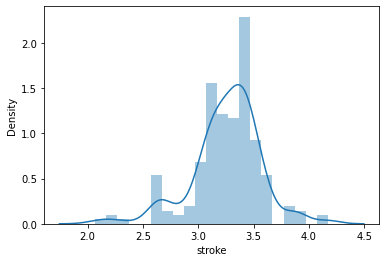

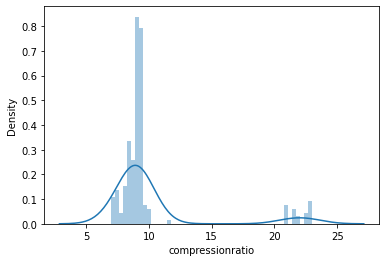

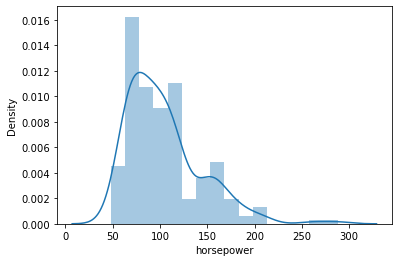

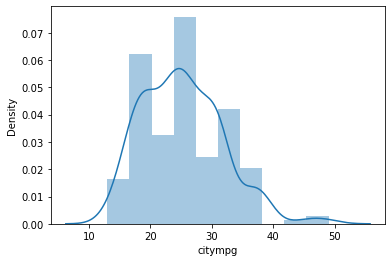

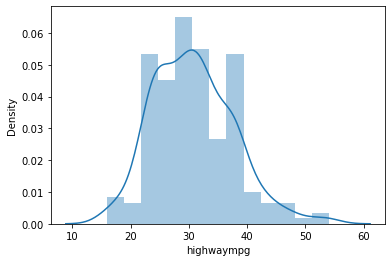

In [10]:
# Checking distribution of Continuous Feature
for feature in continuous_feature:
    sns.distplot(data[feature])
    plt.show()

**OBSERVATION :we see enginesize is right skewed**

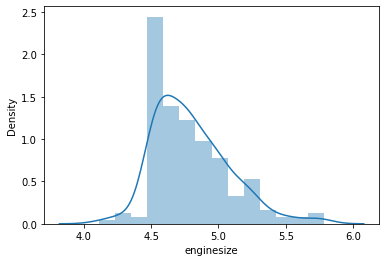

In [11]:
# Performing logarithmic Transformation on 'enginesize'
df=data.copy()
df['enginesize']=np.log(df['enginesize'])
df['price']=np.log(df['price'])
sns.distplot(df['enginesize'])
plt.show()

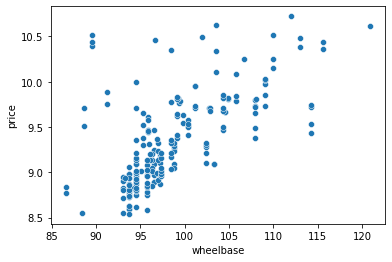

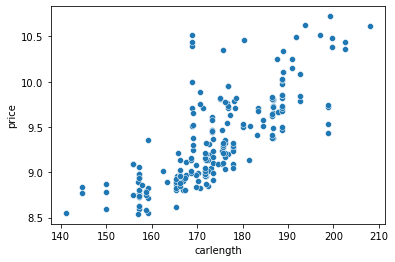

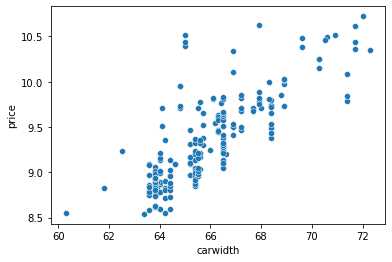

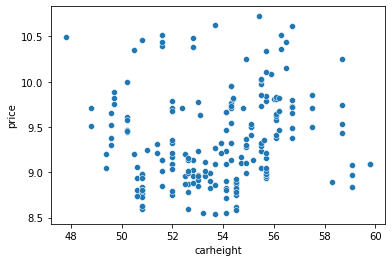

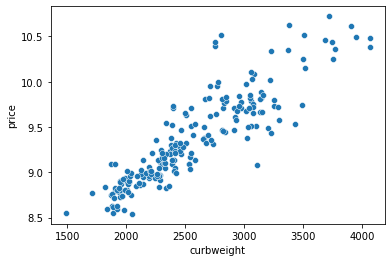

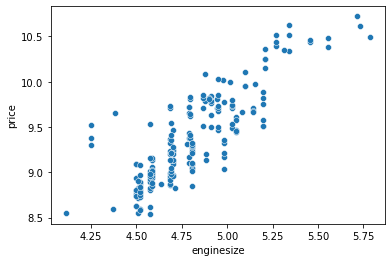

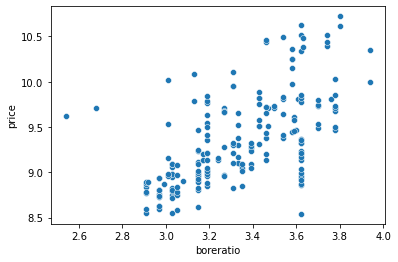

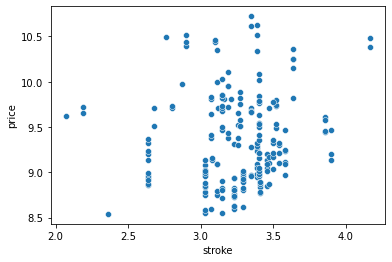

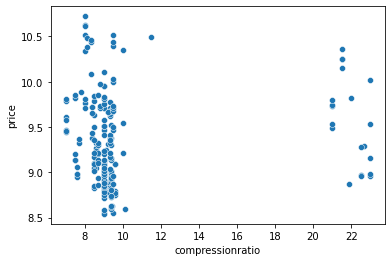

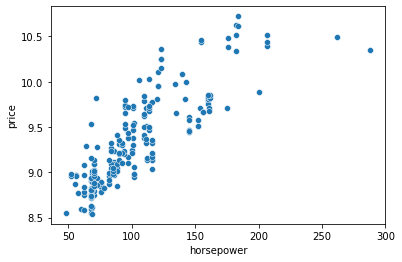

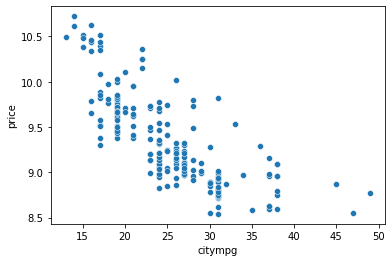

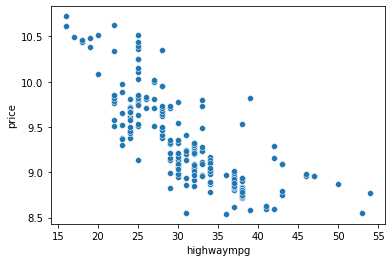

In [12]:
# Scatter Plot
for feature in continuous_feature:
    sns.scatterplot(df[feature],df['price'])
    plt.show()

**OBSERVATION : Feature such as [ 'curbweight' , 'enginesize' , 'horsepower' ] has strong correlation with 'price'**

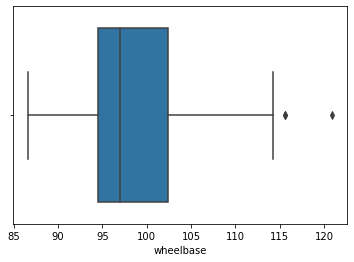

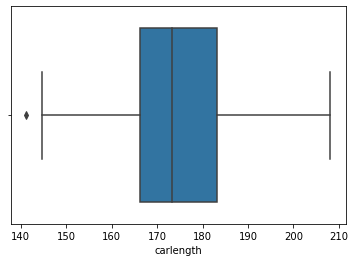

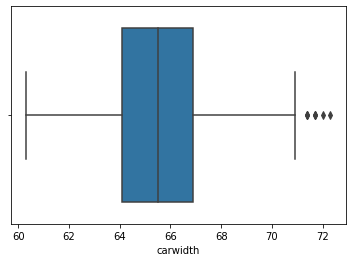

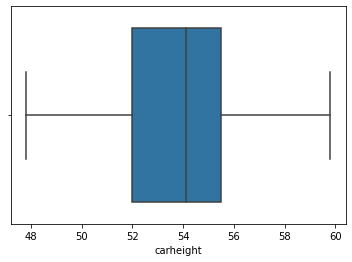

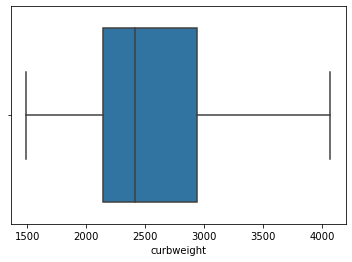

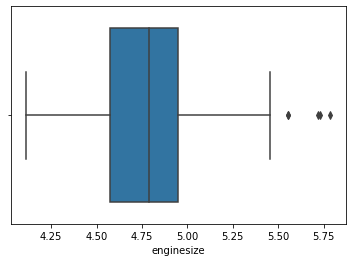

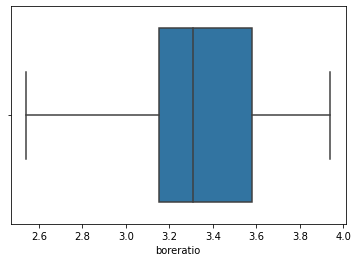

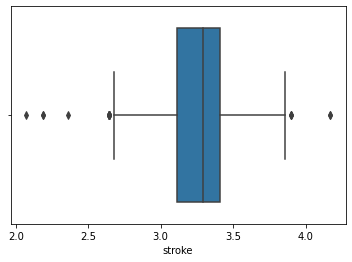

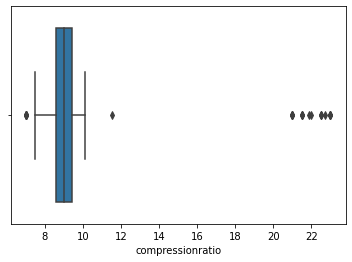

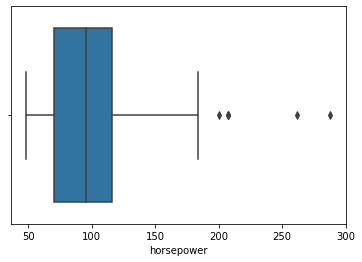

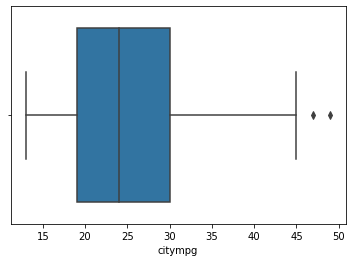

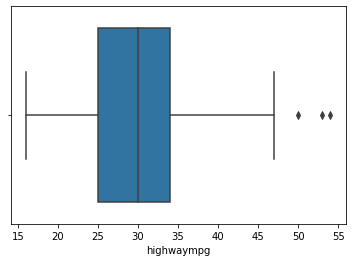

In [13]:
# Checking for Outliers
for feature in continuous_feature:
    sns.boxplot(df[feature])
    plt.show()

**OBSERVATION : [ 'wheelbase', 'carlength' , 'carwidth' , 'enginesize' , 'stroke' , 'compressionratio' , 'horsepower' , 'citympg' ,'highwaympg'] are ahving outliers**

In [14]:
# Exploring Categorical Features
categorical_feature = [feature for feature in df.columns if data[feature].dtypes=="O"]
categorical_feature

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

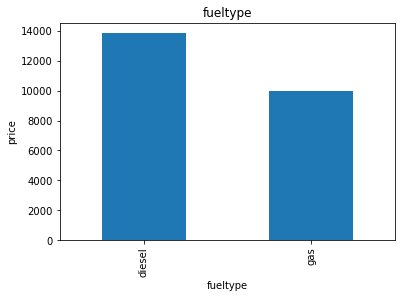

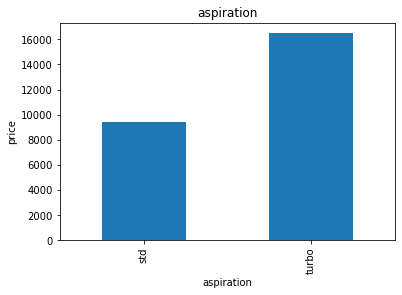

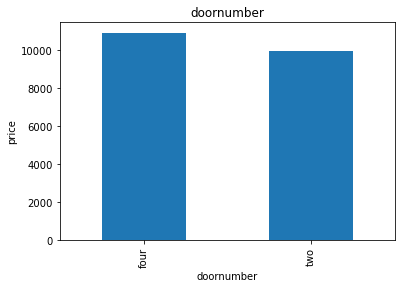

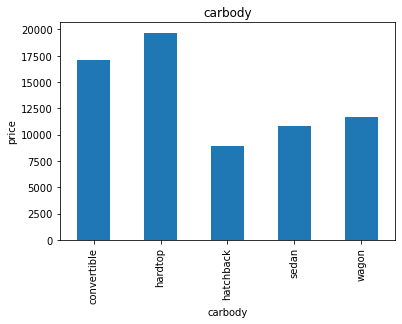

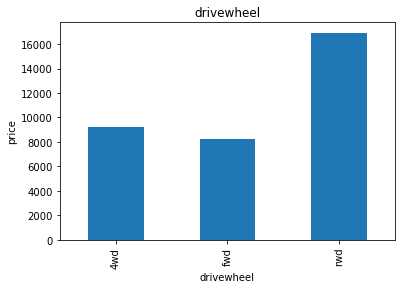

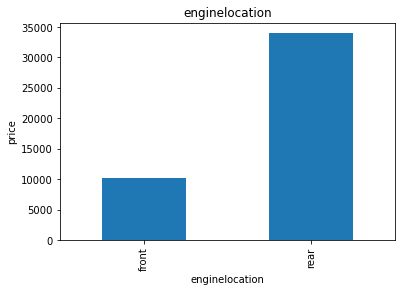

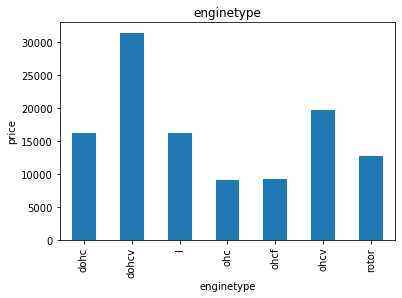

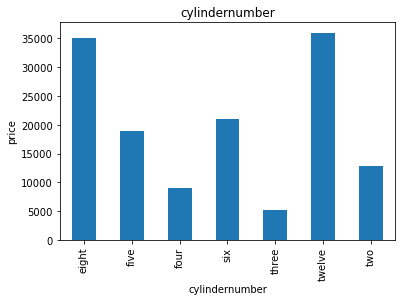

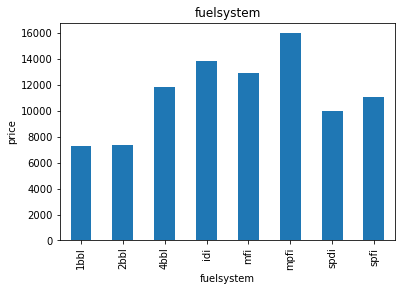

In [15]:
# Plotting barplot to Visualize Relation between Categorical variable and Output variable
for feature in categorical_feature:
    data.groupby(feature)['price'].median().plot.bar()
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

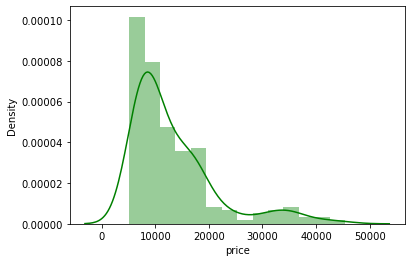

In [16]:
# Distribution of Output Variable
sns.distplot(data['price'],color='g')

In [17]:
# Checking for Multi-Collinearity
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

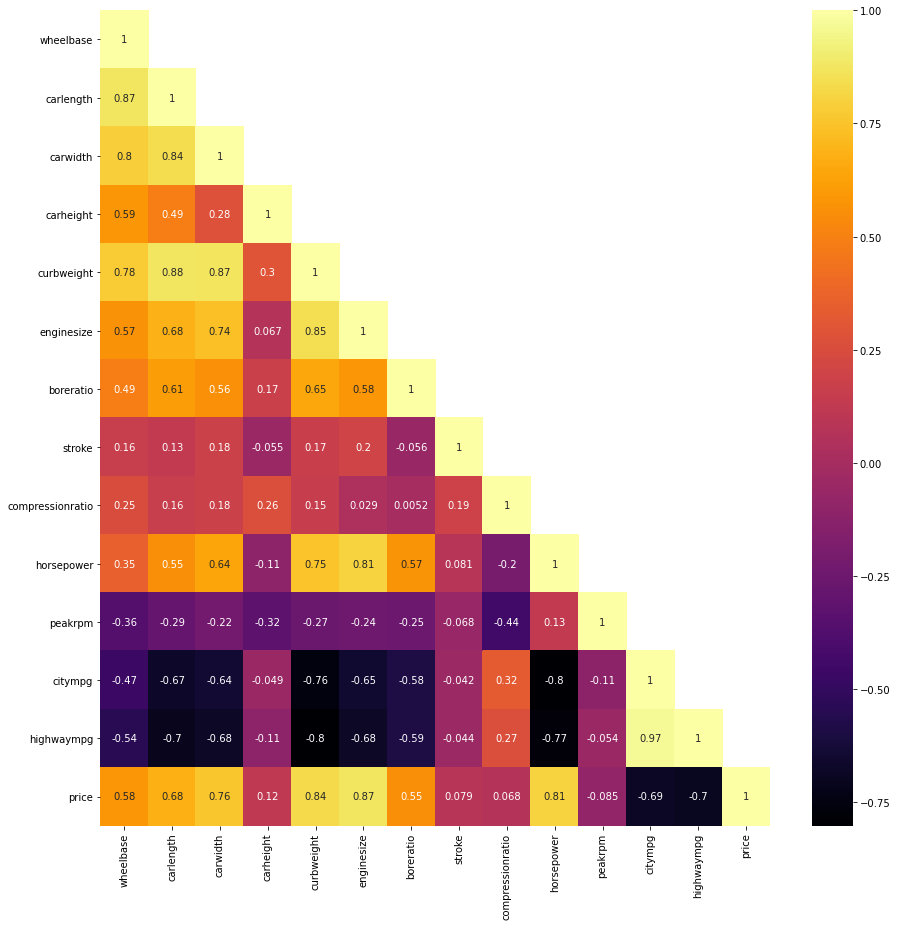

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

In [19]:
#Seperating Independent and Dependent Numerical features
X=data[numerical_feature]
X.drop(['price'],axis=1,inplace=True)
Y=data[['price']]

In [20]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     83.78
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.68e-71
Time:                        19:02:56   Log-Likelihood:                -1937.5
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     191   BIC:                             3949.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.75e+04   1.53e+04     -3.111      0.002   -7.76e+04   -1.74e+04
wheelbase          122.6169    100.465      1.220      0.224     -75.546     320.780
carlength          -94.6752     55.557     -1.704      0.090    -204.259      14.909
carwidth           505.5716    246.013      2.055      0.041      20.319     990.824
carheight          163.1801    135.721      1.202      0.231    -104.524     430.884
curbweight           1.8846      1.737      1.085      0.279      -1.542       5.312
enginesize         117.3461     13.837      8.481      0.000      90.054     144.638
boreratio        -1002.5654   1195.798     -0.838      0.403   -3361.231    1356.100
stroke           -3034.6060    778.604     -3.897      0.000   -4570.373   -1498.839
compressionratio   298.1369     82.914      3.596      0.000     134.592     461.682
horsepower          30.8086     16.216      1.900      0.059      -1.177      62.795
peakrpm              2.3751      0.671      3.540      0.001       1.052       3.698
citympg           -320.3545    177.769     -1.802      0.073    -670.998      30.289
highwaympg         202.8221    159.760      1.270      0.206    -112.299     517.943
==============================================================================
Omnibus:                       24.541   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.326
Skew:                           0.383   Prob(JB):                     2.19e-18
Kurtosis:                       5.989   Cond. No.                     3.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**OBSERVATION :  after studying Correlation Matrix and OLS we observed that 'highwaympg' and 'citympg' have strong correlation i.e. 0.97, so we can consider dropping one of these feature. As 'highwaympg' has high P-Value than 'citympg' we can drop 'highwaympg' feature in Feature Engineering**

# **FEATURE ENGINEERING/DATA PREPROCESSING**

In [22]:
# Dropping 'highwaympg' 
data.drop(['highwaympg'],axis=1,inplace=True)

In [23]:
Outliers=[ 'wheelbase', 'carlength' , 'carwidth' , 'enginesize' , 'stroke' , 'compressionratio' , 'horsepower' , 'citympg']

In [24]:
data[Outliers].describe()

,wheelbase,carlength,carwidth,enginesize,stroke,compressionratio,horsepower,citympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,126.907317,3.255415,10.142537,104.117073,25.219512
std,6.021776,12.337289,2.145204,41.642693,0.313597,3.972040,39.544167,6.542142
min,86.600000,141.100000,60.300000,61.000000,2.070000,7.000000,48.000000,13.000000
25%,94.500000,166.300000,64.100000,97.000000,3.110000,8.600000,70.000000,19.000000
50%,97.000000,173.200000,65.500000,120.000000,3.290000,9.000000,95.000000,24.000000
75%,102.400000,183.100000,66.900000,141.000000,3.410000,9.400000,116.000000,30.000000
max,120.900000,208.100000,72.300000,326.000000,4.170000,23.000000,288.000000,49.000000


In [25]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [26]:
# Separating Independent and Dependent variables
X=data.drop(['price'],axis=1)
y=data['price']

In [27]:
# Applying Logarithmic Transformation of 'enginesize'
df=X.copy()
df['enginesize'] = np.log(df['enginesize'])

In [28]:
# Handling Rare Categorical Variables
for feature in categorical_feature:
    temp=data.groupby(feature)['price'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [29]:
# Handling Categorical Variables(ENCODING)
label = LabelEncoder()
for feature in categorical_feature:
    df[feature] = label.fit_transform(df[feature])
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                                 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],drop_first=True)

In [30]:
# Feature Scaling
scaler=MinMaxScaler()
scaler.fit(df)
dataset=pd.DataFrame(scaler.transform(df),columns=df.columns)
dataset.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,fueltype_1,aspiration_1,doornumber_1,carbody_1,carbody_2,carbody_3,carbody_4,drivewheel_1,drivewheel_2,enginelocation_1,enginetype_1,enginetype_2,enginetype_3,enginetype_4,enginetype_5,enginetype_6,cylindernumber_1,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,fuelsystem_1,fuelsystem_2,fuelsystem_3,fuelsystem_4,fuelsystem_5,fuelsystem_6
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.451462,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.451462,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.544746,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.346340,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.478383,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X=dataset.copy()

# **MODEL BUILDING**

In [32]:
# Applying Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [34]:
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)

In [35]:
r2_score(y_test, y_predLR)

0.8784229943153112